<a href="https://colab.research.google.com/github/UERJ-FISICA/ML4PPGF_UERJ/blob/PPGF-2023-2/02-Building_Perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taken from
https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/perceptron.py

In this notebook, we are going to build a neural network called the Perceptron using numpy and train it.

## What is a neural network?
A neural network is a type of machine learning model which is inspired by our neurons in the brain where many neurons are connected with many other neurons to translate an input to an output (simple right?). Mostly we can look at any machine learning model and think of it as a function which takes an input and produces the desired output; it's the same with a neural network.

## What is a Perceptron?

The perceptron is an artificial neuron that constitutes the basic building block of many neural network architectures. Think of the perceptron as a function which takes a bunch of inputs multiply them with weights and add a bias term and activate this linear transformation with a nonlinearity to generate an output.

<br/> <center>$Z= \Theta( W \cdot X + {b}) $</center> <br>

<center>
<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/perceptron.png" align='center'> <br>
<b>Fig 1: Perceptron</b>
</center>


$\Theta$ is the Heaviside step function (the activation function in the Perceptron).


## Implementing the Perceptron

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)



##Training loop

(120, 2) [[ -1.96601474  -8.59689627]
 [  1.40959572  -1.62390046]
 [ -0.75207647 -10.78902785]
 [ -0.53278301  -1.64847081]
 [ -0.12118447  -1.40749481]
 [  1.63390085  -0.8488804 ]
 [  2.16703063  -1.58150634]
 [ -2.22746033 -10.10199625]
 [  0.41265265  -0.97904899]
 [ -0.94967461  -0.94653968]
 [  0.80950287  -2.80255275]
 [ -1.51976189 -11.65456824]
 [ -2.77238005  -9.64264532]
 [ -0.71409072 -10.10744305]
 [ -2.39394095  -8.86022552]
 [ -3.10495944  -8.38861021]
 [  0.48926519  -2.3641837 ]
 [ -0.4141638   -8.1708518 ]
 [ -2.0136214  -10.45681188]
 [ -0.28925107   0.60114833]
 [ -0.70107521  -7.07465695]
 [  2.18263294  -0.90473206]
 [ -0.89113519  -8.05385981]
 [ -1.49987326  -1.23210622]
 [  1.05336305  -1.12650924]
 [ -2.46989189  -9.02672818]
 [  2.0020706   -0.49726328]
 [ -1.68069426  -9.4116619 ]
 [ -1.57009042 -10.02420345]
 [ -1.56261177  -7.13854024]
 [ -0.82493081  -8.13917717]
 [ -0.54909408  -8.74918828]
 [ -0.72959071  -8.70943181]
 [  1.90763236  -0.67110501]
 [ -3

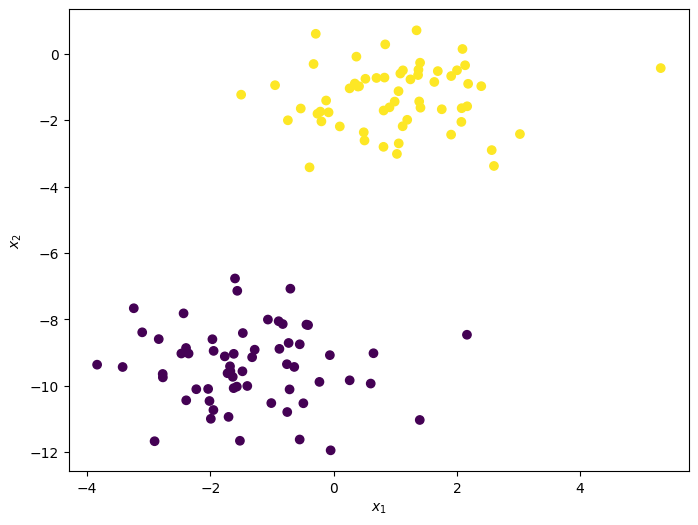

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Dataset
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print ( X_train.shape, X_train )
print ( y_train.shape, y_train )

def plot_data( X, y ):
    plt.scatter( X[:, 0], X[:, 1], marker="o", c=y)
    plt.xlabel( r"$x_1$" )
    plt.ylabel( r"$x_2$" )

fig = plt.figure( figsize=(8,6) )
plot_data( X_train, y_train )

In [3]:
# Training
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

# Accuracy using test data set

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

predictions = p.predict(X_test)

print("Perceptron classification accuracy:", accuracy(y_test, predictions) )

Perceptron classification accuracy: 1.0


(-14.942258713992134, 3.706042557004803)

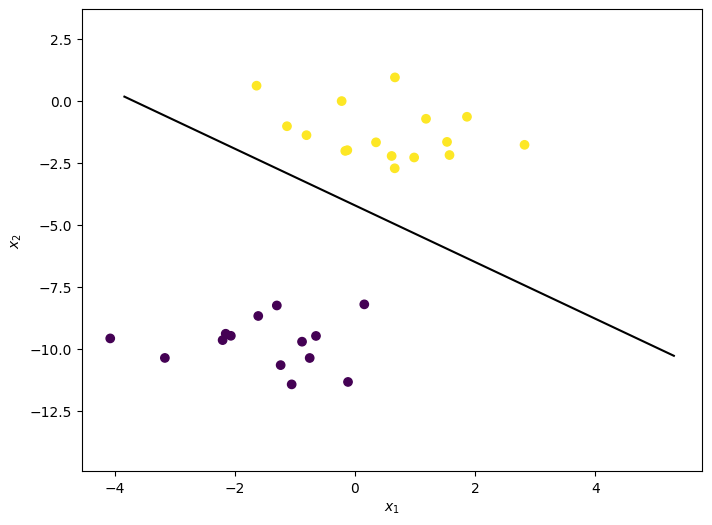

In [4]:
# Plot results
# Line that intercepts the y = 0 plane
x1_1 = np.amin(X_train[:, 0])
x1_2 = np.amax(X_train[:, 0])
x2_1 = (-p.weights[0] * x1_1 - p.bias) / p.weights[1]
x2_2 = (-p.weights[0] * x1_2 - p.bias) / p.weights[1]

fig = plt.figure( figsize=(8,6) )
# plot_data( X_train, y_train )
plot_data( X_test, y_test )
plt.plot( [x1_1, x1_2], [x2_1, x2_2], "k")
x2_min = np.amin(X_train[:, 1])
x2_max = np.amax(X_train[:, 1])
plt.ylim([x2_min - 3, x2_max + 3])